## How to execute the program ##

Run all the cells in the sequential order for all the problems.

## Misc ##

In [203]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
from numpy.linalg import inv
import seaborn as sns
from tqdm import tqdm
import math

In [204]:
from google.colab import files

uploaded = files.upload()

Saving insurance.csv to insurance (1).csv


## Problem 1 ##

In [205]:
def generate_dataset_1():

  y = np.zeros(30)
  y[0:15] = 1
  np.random.shuffle(y)
  y = y.astype(int)

  x11 = np.random.uniform(2,7,15)
  x21 = np.random.uniform(4,6,15)

  x10 = np.zeros(30)
  x10[0:15] = np.random.uniform(0,2,15)
  x10[15:30] = np.random.uniform(7,9,15)
  np.random.shuffle(x10)
  x10 = x10[0:15]

  x20 = np.zeros(30)
  x20[0:15] = np.random.uniform(1,3,15)
  x20[15:30] = np.random.uniform(6,8,15)
  np.random.shuffle(x20)
  x20 = x20[0:15]

  i = 0
  j = 0
  x1 = np.zeros(30)
  x2 = np.zeros(30)
  for k in range(30):
    if y[k] == 1:
      x1[k] = x11[i]
      x2[k] = x21[i]
      i += 1
    else:
      x1[k] = x10[j]
      x2[k] = x20[j]
      j+=1

  print('x1 =',x1)
  print('x2 =',x2)
  print('y =',y)

  return x1, x2, y

In [206]:
def plot_dataset_1(x1,x2,y):
  
  fig, ax = plt.subplots()
  
  colors = np.array([ 'g', 'r' ])
  ax.scatter(x1, x2, c=colors[y], lw=0, s=10)
  
  ax.set_xlabel("x1")
  ax.set_ylabel("x2")
  
  plt.show()

In [208]:
def most_specific_hypothesis_rectangle(x1, x2, y):

  s1 = 7
  s1_ = 2
  s2 = 6
  s2_ = 4

  for j in range(30):
    if y[j] == 1:
      s1 = min(s1, x1[j])
      s1_ = max(s1_, x1[j])
      s2 = min(s2, x2[j])
      s2_ = max(s2_, x2[j])

  l1 = s1_ - s1
  b1 = s2_ - s2

  return s1, s2, l1, b1

In [209]:
def most_general_hypothesis_rectangle(x1, x2, y):

  g1 = 0
  g1_ = 9
  g2 = 1
  g2_ = 8

  for j in range(30):
    if y[j] == 0:
      if x1[j] <= 2:
        g1 = max(g1, x1[j])
      elif x1[j] >= 7:
        g1_ = min(g1_, x1[j])
      if x2[j] <= 3:
        g2 = max(g2, x2[j])
      elif x2[j] >=6:
        g2_ = min(g2_, x2[j])

  l2 = g1_ - g1
  b2 = g2_ - g2

  return g1, g2, l2, b2

In [210]:
def most_specific_hypothesis_circle(x1, x2, y):

  sx = []
  sy = []
  for i in range(30):
    if y[i] == 1:
      sx.append(x1[i])
      sy.append(x2[i])

  xp = sum(sx)/len(sx)
  yp = sum(sy)/len(sy)

  sr = 0
  for i in range(len(sx)):
    d = math.sqrt(pow((sx[i] - xp),2) + pow((sy[i] - yp),2)) 
    if d > sr:
      sr = d 
  
  return xp, yp, sr

In [211]:
def most_general_hypothesis_circle(x1, x2, y):

  sx = []
  sy = []
  for i in range(30):
    if y[i] == 1:
      sx.append(x1[i])
      sy.append(x2[i])

  xp = sum(sx)/len(sx)
  yp = sum(sy)/len(sy)

  gx = []
  gy = []
  for i in range(30):
    if y[i] == 0:
      gx.append(x1[i])
      gy.append(x2[i])

  gr = math.inf
  for i in range(len(gx)):
    d = math.sqrt(pow((gx[i] - xp),2) + pow((gy[i] - yp),2)) 
    if d < gr:
      gr = d 
  
  return xp, yp, gr

In [212]:
def plot_hypothesis_rectangle(x1, x2, y, s, g):

  fig, ax = plt.subplots()
  
  colors = np.array([ 'g', 'r' ])
  ax.scatter(x1, x2, c=colors[y], lw=0, s=10)
  
  rect_specific = Rectangle((s[0], s[1]), s[2], s[3], color ='blue', fill=False)
  rect_general = Rectangle((g[0], g[1]), g[2], g[3], color ='black', fill=False)
  ax.add_patch(rect_specific)
  ax.add_patch(rect_general)
  
  ax.set_xlabel("x1")
  ax.set_ylabel("x2")
  
  plt.show()

In [213]:
def plot_hypothesis_circle(x1, x2, y, s_, g_):

  fig, ax = plt.subplots()
  
  colors = np.array([ 'g', 'r' ])
  ax.scatter(x1, x2, c=colors[y], lw=0, s=10)
  
  circle_specific = Circle((s_[0], s_[1]), s_[2], color ='blue', fill=False)
  circle_general = Circle((g_[0], g_[1]), g_[2], color ='black', fill=False)
  ax.add_patch(circle_specific)
  ax.add_patch(circle_general)
  
  ax.set_xlabel("x1")
  ax.set_ylabel("x2")
  
  plt.show()

In [214]:
x1, x2, y_1 = generate_dataset_1()

x1 = [6.81227401 0.46631441 1.64671606 3.29254636 0.50362802 5.06416755
 1.13571261 1.17369375 8.11316778 6.30680361 1.39079765 2.15048831
 2.23392013 4.85258695 3.05693635 8.87180834 4.96059733 1.69567476
 2.0777718  5.38945714 1.59287678 7.1014269  8.42397912 2.43047865
 2.5881072  8.56045783 8.58494485 5.04145789 4.3309507  1.36121915]
x2 = [4.58425924 7.7458886  6.4602929  4.94402076 2.62398431 5.84055315
 6.83684787 2.59184651 2.99689567 4.06110257 7.91172368 4.70335617
 5.22734663 5.68169698 5.86168227 1.79790455 5.13062083 6.32263677
 5.58189699 5.8757294  6.57514184 6.13585731 7.65287542 4.27763502
 4.75888482 2.72962399 7.83322332 5.66410771 4.14197884 6.97570001]
y = [1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0]


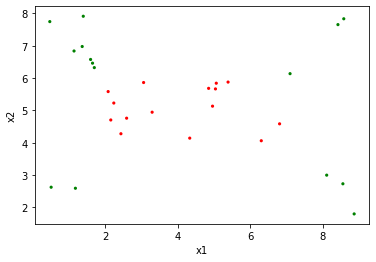

In [215]:
plot_dataset_1(x1,x2,y_1)

In [216]:
s1, s2, l1, b1 = most_specific_hypothesis_rectangle(x1, x2, y_1)
s = [s1, s2, l1, b1]

In [217]:
g1, g2, l2, b2 = most_general_hypothesis_rectangle(x1, x2, y_1)
g = [g1, g2, l2, b2]

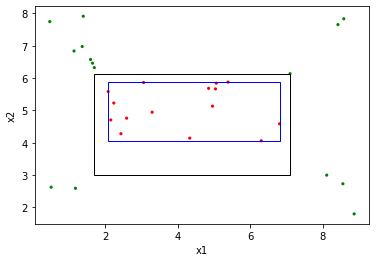

In [218]:
plot_hypothesis_rectangle(x1, x2, y_1, s, g)

In [219]:
x, y, sr = most_specific_hypothesis_circle(x1, x2, y_1)
s_ = [x, y, sr]

In [220]:
x, y, gr = most_general_hypothesis_circle(x1, x2, y_1)
g_ = [x, y, gr]

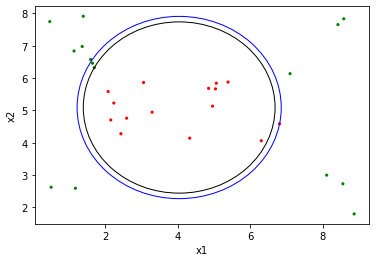

In [221]:
plot_hypothesis_circle(x1, x2, y_1, s_, g_)

### Observations in Problem 1 ###

I found the most general and most specific hypothesis when hypothesis class is rectangle very accurately. The most specific rectangle is always inside the most general rectangle which shows that it is consistent with the theoretically expected outcome. However, the most general and most specific hypothesis when hypothesis class is circle seems to be very inconsistent. I found the mean of the points that belong to y=1 class and and took it as the center for both circles. I found the distance between farthest point from center belonging to y=1 class and the center and took it as radius for most specific circle. I found the distance between nearest point from center belonging to y=0 class and the center and took it as radius for most general circle. However, the results are inconsistent as the most general circle is sometimes larger than the most specific circle.

## Problem 2 ##

In [222]:
def generate_dataset_2(n):

  pi = np.pi
  x = np.linspace(0,2*pi,n)
  noise = np.random.normal(0,0.02,n)
  y = np.cos(2*pi*x) + x/(2*pi) + noise

  return x, y

In [223]:
def plot_dataset_2(x, y):

  fig, ax = plt.subplots()
  ax.plot(x,y,'-ko', markevery=0.1, markersize=4)
  plt.title('The function f(x) having %d points'%(x.shape[0]))
  plt.show()

In [224]:
class PolynomialRegression:

  def __init__(self, degree):
    self.degree = degree
    self.w = None

  def transform_x(self, x):

    x_transform = []
    for i in range(self.degree+1):
      x_transform.append(np.power(x,i))
    x_transform = np.array(x_transform)
    x_transform = x_transform.T

    return x_transform

  def fit(self, x, y):

    x = self.transform_x(x)
    self.w = inv((x.T).dot(x)).dot(x.T).dot(y)

  def predict(self, x):
    
    x = self.transform_x(x)
    y_pred = x.dot(self.w)
    return y_pred

In [225]:
def plot_results_2(x, y, y_pred):

  m = np.array([1, 2, 3, 5, 7, 10])
  colors = np.array([ 'b', 'g', 'r', 'c', 'm', 'y' ])
  
  fig, ax = plt.subplots()
  ax.plot(x,y,'-k', marker='o', label='f(x)', markevery=0.1, markersize=4)
  
  for i in range(6):
    ax.plot(x,y_pred[i], linestyle='-', marker='o', color=colors[i], label='degree = %d'%(m[i]), markevery=0.1, markersize=4)

  ax.set_xlabel("x1")
  ax.set_ylabel("x2")
  ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
  plt.title('Polynomial fit of f(x) with different degrees')

  plt.show()

In [226]:
def PolynomialRegressionAnalysis(n):

  x, y = generate_dataset_2(n)
  plot_dataset_2(x,y)

  m = np.array([1, 2, 3, 5, 7, 10])
  y_pred = []

  for i in range(6):
    polyreg = PolynomialRegression(m[i])
    polyreg.fit(x,y)
    y_pred_ = polyreg.predict(x)
    y_pred.append(y_pred_)

  y_pred = np.array(y_pred)
  plot_results_2(x, y, y_pred)

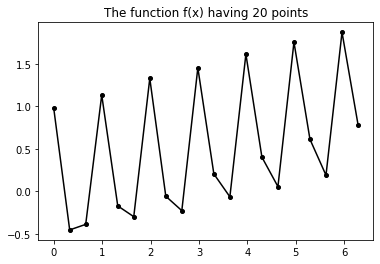

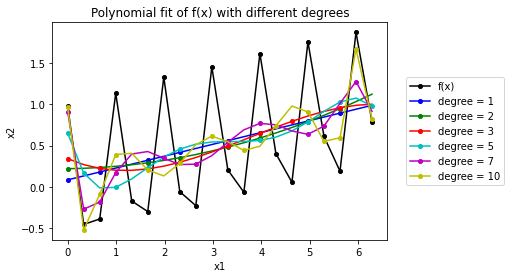

In [227]:
PolynomialRegressionAnalysis(20)

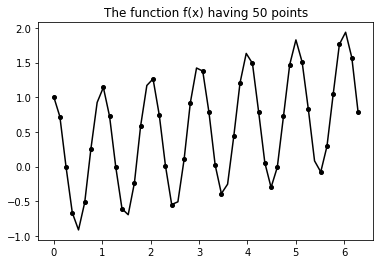

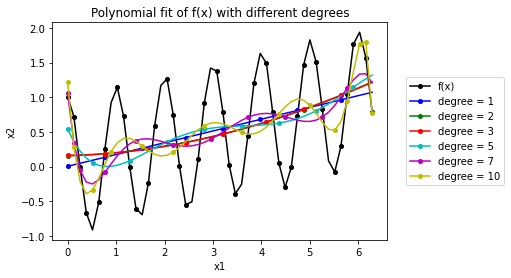

In [228]:
PolynomialRegressionAnalysis(50)

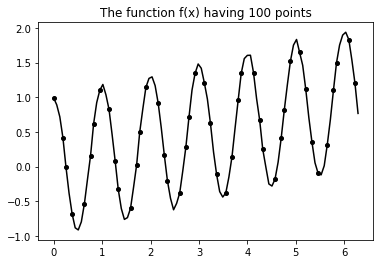

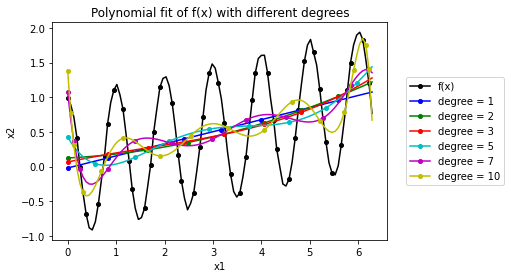

In [160]:
PolynomialRegressionAnalysis(100)

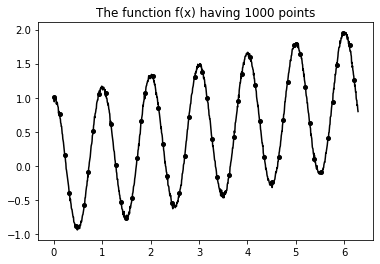

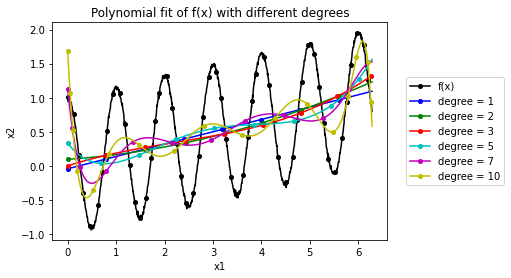

In [161]:
PolynomialRegressionAnalysis(1000)

### Observations in Problem 2 ###

I performed Polynomial Regression on the given function containing 20, 50, 100 and 1000 data points. We can observe that as value of M i.e degree of the polynomial increases, the model resembles closer to the original function as the amplitude of the polynomial increases with increase in degree which is desirable as the amplitude of original function is high and very significant. The function generated is fit better and resembles more like the original function as number of points are increased from 20 to 50. However, there is no notable difference when the number of points are increased to 100 and 1000. In fact, it seems to have fit worse with increase in number of points as you can  observe that polynomial of degree 10 in case of 1000 points seems to start from a higher value than it is supposed to. I feel, that 50 data points will be ideal to fit the given function. In addition, higher degree polynomial is fit better. So, degree = 10 seems like the best choice out of all available options.

## Problem 3 ##

In [162]:
def data_preprocessing(data):

  data['sex'] = data.sex.astype("category").cat.codes
  data['smoker'] = data.smoker.astype("category").cat.codes
  data['region'] = data.region.astype("category").cat.codes

  return data

In [163]:
def feature_normalization(data):

  for col in data:
    mean = data[col].sum()/float(data.shape[0])
    var =  sum([pow(data.iloc[i][col]-mean, 2) for i in range(data.shape[0])])
    std = np.sqrt(var/float(data.shape[0]-1))
    data[col] = (data[col] - mean)/std

  return data

In [164]:
def feature_normalization_verification(data):

  for col in data:
    print('Mean of %s is %f'%(col,data[col].mean()))
    print('Standard Deviation of %s is %f'%(col,data[col].std()))


In [165]:
def splitdata(data):
  
  np.random.shuffle(data)
  split_point = int(0.8*(data.shape[0]))
  train_data = data[:split_point,:]
  test_data = data[split_point:,:]
  return train_data, test_data

In [166]:
def kcrossvalsplit(data, folds):

  m = data.shape[0]
  fold_size = int(np.floor(m/folds))
  left_out = m - folds*fold_size
  data_split = []
  
  for i in range(folds):
    fold = data[i*fold_size:(i+1)*fold_size,:]
    if left_out > 0:
      np.append(fold, data[(folds*fold_size)+i,:], axis=0)
      left_out -= 1
    data_split.append(fold)
  
  data_split = np.array(data_split)
  return data_split

In [167]:
class RidgeRegression: 

  def __init__(self, penalty, learning_rate = 0.001, epochs = 1000):
    self.penalty = penalty
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.weights = None
    self.bias = None

  def fit(self, train_data):

    x = train_data[:,:-1]
    y = train_data[:,-1]
    y = y.reshape(y.shape[0],1)

    m, n = x.shape 

    self.weights = np.zeros((n,1))
    self.bias = 0

    for epoch in range(self.epochs):

      y_hat = np.dot(x, self.weights) + self.bias

      dw = (2/m)*((x.T).dot(y_hat - y)) + (2*self.penalty*self.weights)/m 
      db = (2/m)*np.sum((y_hat - y))

      self.weights -= self.learning_rate*dw
      self.bias -= self.learning_rate*db
    
  def predict(self, x):
    return np.dot(x, self.weights) + self.bias

In [168]:
def mse(y, y_hat):
  return np.sum(np.square(y-y_hat))/y.shape[0]

In [169]:
def kcrosstraininganalysis(data_split):

  lambdalist = [[j*pow(10,i) for j in range(1,10)] for i in range(-5,5)]
  lambdalist = list(np.concatenate(lambdalist).flat)
  lambdalist.insert(0, 0)
  MSE=[]

  for penalty in tqdm(lambdalist):

    ridgereg = RidgeRegression(penalty)
    folds = data_split.shape[0]
    mse_scores = []

    for index in range(folds):

      indices = np.arange(folds)
      train_data = data_split[indices != index,:,:]
      train_data = train_data.reshape(train_data.shape[0]*train_data.shape[1], train_data.shape[2])
      val_data = data_split[index]
      ridgereg.fit(train_data)

      x_val = val_data[:,:-1]
      y_val = val_data[:,-1]
      y_val = y_val.reshape(y_val.shape[0],1)
      y_pred = ridgereg.predict(x_val)
      mse_score = mse(y_val, y_pred)
      mse_scores.append(mse_score)

    avg_mse = sum(mse_scores)/len(mse_scores) 
    MSE.append(avg_mse) 
    
  fig, ax = plt.subplots()
  ax.plot(lambdalist, MSE,'-k',label='Mean Square Error')
  ax.set_xscale("log")
  ax.set_xlabel('lambda')
  ax.legend()
  plt.show()

In [171]:
def kcrosstestinganalysis(data_split, test_data):

  lambdalist = [[j*pow(10,i) for j in range(1,10)] for i in range(-5,5)]
  lambdalist = list(np.concatenate(lambdalist).flat)
  lambdalist.insert(0, 0)
  MSE_train=[]
  MSE_test=[]
  variance=[]

  for penalty in tqdm(lambdalist):

    ridgereg = RidgeRegression(penalty)
    folds = data_split.shape[0]
    mse_train_scores = []
    mse_test_scores = []
    test_pred = []

    for index in range(folds):

      indices = np.arange(folds)
      train_data = data_split[indices != index,:,:]
      train_data = train_data.reshape(train_data.shape[0]*train_data.shape[1], train_data.shape[2])
      val_data = data_split[index]
      ridgereg.fit(train_data)

      x_val = val_data[:,:-1]
      y_val = val_data[:,-1]
      x_test = test_data[:,:-1]
      y_test = test_data[:,-1]
      
      y_val = y_val.reshape(y_val.shape[0],1)
      y_train_pred = ridgereg.predict(x_val)
      mse_train_score = mse(y_val, y_train_pred)
      mse_train_scores.append(mse_train_score)

      y_test = y_test.reshape(y_test.shape[0],1)
      y_test_pred = ridgereg.predict(x_test)
      mse_test_score = mse(y_test, y_test_pred)
      mse_test_scores.append(mse_test_score)

      test_pred.append(y_test_pred) 

    avg_train_mse = sum(mse_train_scores)/len(mse_train_scores) 
    MSE_train.append(avg_train_mse) 

    avg_test_mse = sum(mse_test_scores)/len(mse_test_scores) 
    MSE_test.append(avg_test_mse) 

    test_pred = np.array(test_pred) 
    test_pred = test_pred.reshape(test_pred.shape[0],test_pred.shape[1]) 
    var = np.mean(np.square(test_pred - np.mean(test_pred, axis=0)))
    variance.append(var)
    
  fig, ax = plt.subplots()
  ax.plot(lambdalist, MSE_train,'-r',label='Training Error')
  ax.plot(lambdalist, MSE_test,'-g',label='Test Error')
  ax.plot(lambdalist, variance,'-b',label='Variance')
  ax.set_xscale("log")
  ax.set_xlabel('lambda')
  ax.legend()
  plt.show()

In [172]:
data = pd.read_csv('insurance.csv')

In [173]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [175]:
data = data_preprocessing(data)

In [176]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [177]:
data = feature_normalization(data)

In [178]:
feature_normalization_verification(data)

Mean of age is -0.000000
Standard Deviation of age is 1.000000
Mean of sex is -0.000000
Standard Deviation of sex is 1.000000
Mean of bmi is -0.000000
Standard Deviation of bmi is 1.000000
Mean of children is -0.000000
Standard Deviation of children is 1.000000
Mean of smoker is -0.000000
Standard Deviation of smoker is 1.000000
Mean of region is 0.000000
Standard Deviation of region is 1.000000
Mean of charges is -0.000000
Standard Deviation of charges is 1.000000


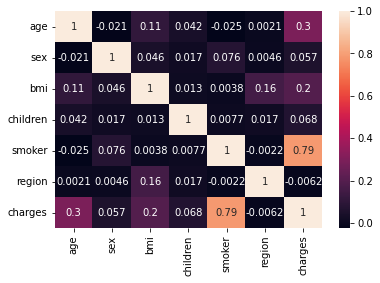

In [179]:
sns.heatmap(data.corr(), annot=True)

In [180]:
data = data.to_numpy()

In [181]:
training_data, testing_data = splitdata(data)

In [182]:
data_split = kcrossvalsplit(training_data, 10)

100%|██████████| 91/91 [00:40<00:00,  2.26it/s]


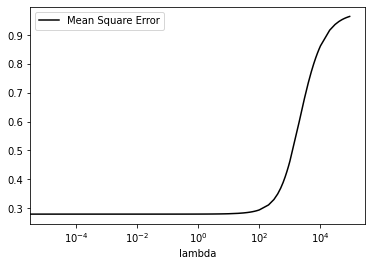

In [183]:
kcrosstraininganalysis(data_split)

100%|██████████| 91/91 [00:40<00:00,  2.23it/s]


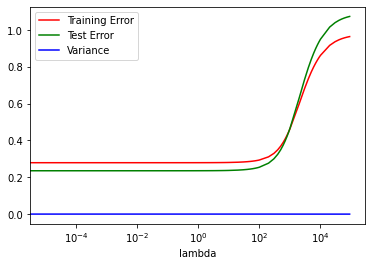

In [184]:
kcrosstestinganalysis(data_split, testing_data)

### Observations in Problem 3 ###

From the plot on mean square error we can observe that the error remains low and almost constant for λ < 100 and λ keeps on increasing after that point. Since, the mse for λ < 100 is almost constant, we can choose any value between 0 and 100 for λ to keep mse minimum. 

On plotting training error, test error and variance, we have few observations. We observe that training error and test error are almost same for all values of lambda which suggests that variance is low and that is further proved by plotting variance which is found to be closer to zero for all values of lambda. The bias remains almost constant and low for λ < 100. We know that we should always aim for low bias and low varinace. Therefore, we can choose any value between 0 and 100 for λ. The ideal values for λ seem to be the same in both questions.